[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mortgad/DLVR/blob/main/modelling_with_filtered_data.ipynb)

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
base_dir = '/content/drive/MyDrive/Deep_Learning_Visual_Recognition/Project'
folder_name = 'UTKFace_Filtered'
metadata_file = 'UTKFace_Filtered_Metadata.csv'
filtered_images_dir = os.path.join(base_dir, folder_name)

# Load csv-file
import pandas as pd
df = pd.read_csv(os.path.join(base_dir, metadata_file))

# Preprocess df
df = df[['age_raw','gender_code','race_code','file']]
df = df[df['age_raw']<=100]
df.rename(columns={'age_raw': 'age_code'}, inplace=True)

# Fix paths
df['file'] = df['file'].apply(lambda x: os.path.join(filtered_images_dir, x))

# Display
df.head()

,age_code,gender_code,race_code,file
0,22,1,3,/content/drive/MyDrive/Deep_Learning_Visual_Re...
1,39,0,4,/content/drive/MyDrive/Deep_Learning_Visual_Re...
2,75,0,0,/content/drive/MyDrive/Deep_Learning_Visual_Re...
3,3,1,4,/content/drive/MyDrive/Deep_Learning_Visual_Re...
4,39,0,0,/content/drive/MyDrive/Deep_Learning_Visual_Re...


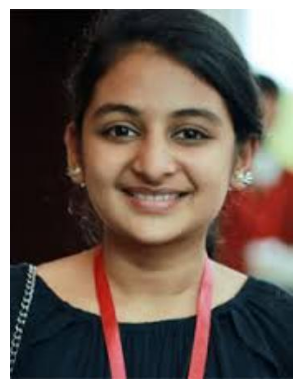

In [5]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Get the first path in the 'file' column
first_path = df['file'].iloc[0]

try:
    # Open and display the image
    img = Image.open(first_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"File not found at path: {first_path}")


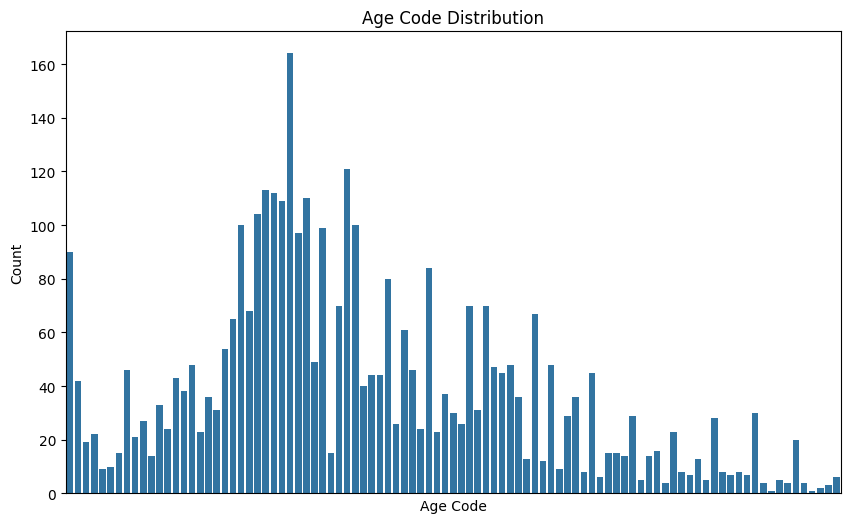

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='age_code', data=df)
plt.title('Age Code Distribution')
# Remove x-axis labels
plt.xticks([])
plt.xlabel('Age Code')
plt.ylabel('Count')
plt.show()

In [11]:
!git clone https://github.com/mortgad/DLVR.git
%cd DLVR

Cloning into 'DLVR'...
remote: Enumerating objects: 439, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (199/199), done.
remote: Total 439 (delta 175), reused 168 (delta 97), pack-reused 142 (from 1)
Receiving objects: 100% (439/439), 55.54 MiB | 17.65 MiB/s, done.
Resolving deltas: 100% (237/237), done.
/content/DLVR


In [12]:
from utils.preprocessing import create_lists
# df_first_100 = df.head(100)
df_copy = df.copy()

# Create lists
images, ages, races, genders = create_lists(df_copy)
print(f"Loaded {len(images)} images.")

KeyboardInterrupt: 

In [ ]:


# Number of classes for target variable
num_classes_age = len(set(ages))
num_classes_gender = len(set(genders))
num_classes_ethnicity = len(set(races))
print(f"Number of age classes: {num_classes_age}")
print(f"Number of gender classes: {num_classes_gender}")
print(f"Number of ethnicity classes: {num_classes_ethnicity}")

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

def plot_sample_images(images, ages, races, genders, num_samples=5):
    # Set up the plot dimensions (e.g., 5 images in a single row)
    plt.figure(figsize=(15, 5))

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)

        # Plot each image
        plt.imshow(images[i])

        # Show age, race, and gender as the title
        plt.title(f"Age: {ages[i]}, Race: {races[i]}, Gender: {genders[i]}")

        # Remove axis ticks for a cleaner look
        plt.axis('off')

    # Display the plot
    plt.show()

# Call the function with the first few images
plot_sample_images(images, ages, races, genders, num_samples=5)